In [1]:
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [2]:
X = pd.read_csv("../../R/DataMinning/dengue_features_train.csv")
Y = pd.read_csv("../../R/DataMinning/dengue_labels_train.csv")
X_New = pd.read_csv("../../R/DataMinning/dengue_features_test.csv")
Y_New = pd.read_csv('../../R/DataMinning/submission_format.csv')

In [3]:
X['week_start_date'] = pd.to_datetime(X['week_start_date'])
X_New['week_start_date'] = pd.to_datetime(X['week_start_date'])
X1 = X.fillna(method = 'ffill')
X_New1 = X_New.fillna(method='ffill')
rf = RandomForestRegressor()
le = preprocessing.LabelEncoder()
X1['city'] , X_New1['city'] = le.fit_transform(X1['city']) , le.fit_transform(X_New1['city'])
model1 = rf.fit(X1[(X1['city'] == 1)].drop(columns=['week_start_date','year']),
                Y[(Y['city'] == 'sj')]['total_cases'].values.ravel())


array([0.        , 0.16494198, 0.02387181, 0.01828746, 0.40560431,
       0.08969758, 0.00706287, 0.02218134, 0.0123873 , 0.02225002,
       0.0153571 , 0.01064148, 0.02965635, 0.01064337, 0.00630768,
       0.03751882, 0.02091718, 0.03714452, 0.01685449, 0.01156406,
       0.01300893, 0.02410134])

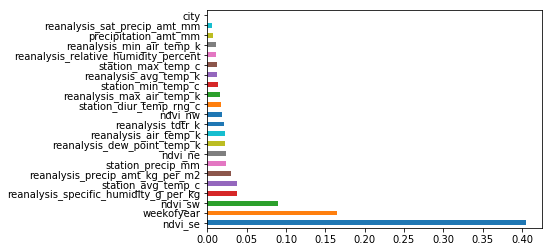

In [4]:
importance = rf.feature_importances_
feat_importances = pd.Series(importance, index=X1.drop(columns=['week_start_date','year']).columns)
feat_importances = feat_importances.nlargest(22)
feat_importances.plot(kind='barh')
importance


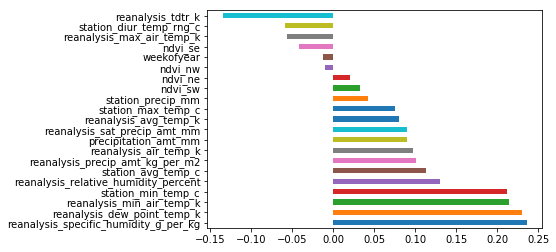

In [5]:
X['total_cases'] = Y['total_cases']
crr = X[(X['city']=='iq')].drop(columns=['year']).corr()
crr.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

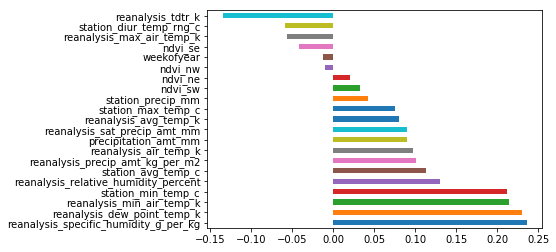

In [6]:
crr = X[(X['city']=='iq')].drop(columns=['year']).corr()
crr.total_cases.drop(['total_cases']).sort_values(ascending=False).plot.barh()


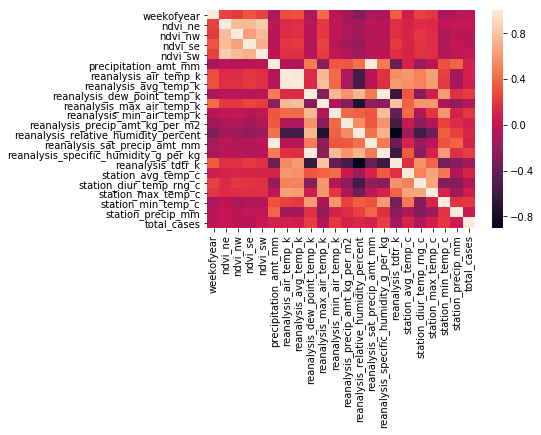

In [7]:
sns.heatmap(crr, 
        xticklabels=crr.columns,
        yticklabels=crr.columns)
